# Importing Packages

In [91]:
import numpy as np 
import pandas as pd 
import missingno as msno
import plotly.express as px
import plotly.graph_objs as go
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Loading Dataset

In [92]:
data = pd.read_csv("Housing.csv")
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


# Data Exploration

In [93]:
data.shape

(545, 13)

In [94]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [95]:
# Checking dublicated rows
data.duplicated().sum()

0

<Axes: >

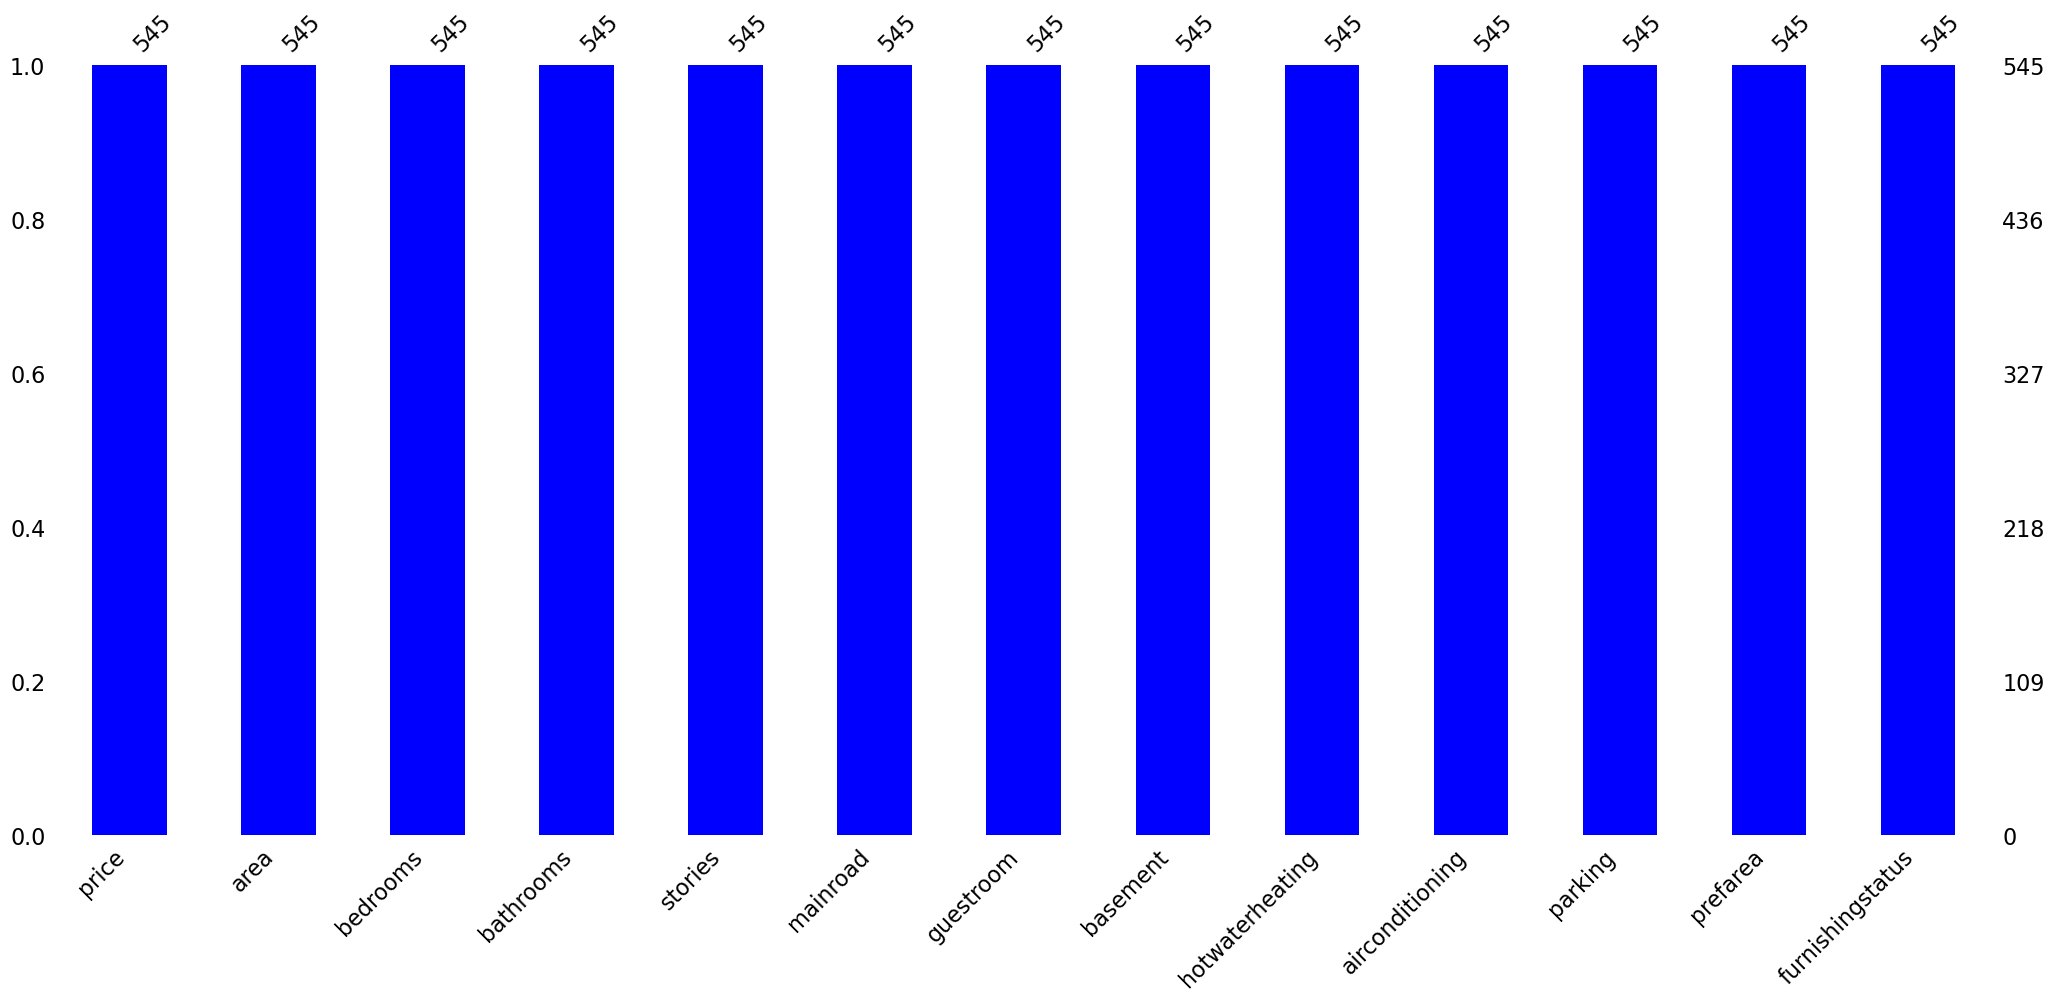

In [96]:
# Checking null values
msno.bar(data,color='b')

# Data Analysis

In [97]:
def draw_pie_chart(data, column):
    counts = data[column].value_counts()
    
    # Create the pie chart
    fig = px.pie(
        values=counts.values,
        names=counts.index,
        title=f'Pie Chart for {column}',
        labels={column: column}
    )
    
    fig.show()

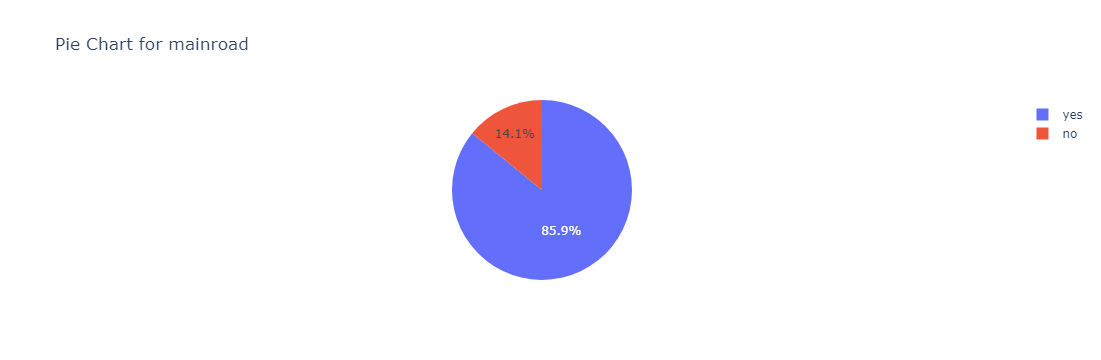

In [98]:
 draw_pie_chart(data, "mainroad")

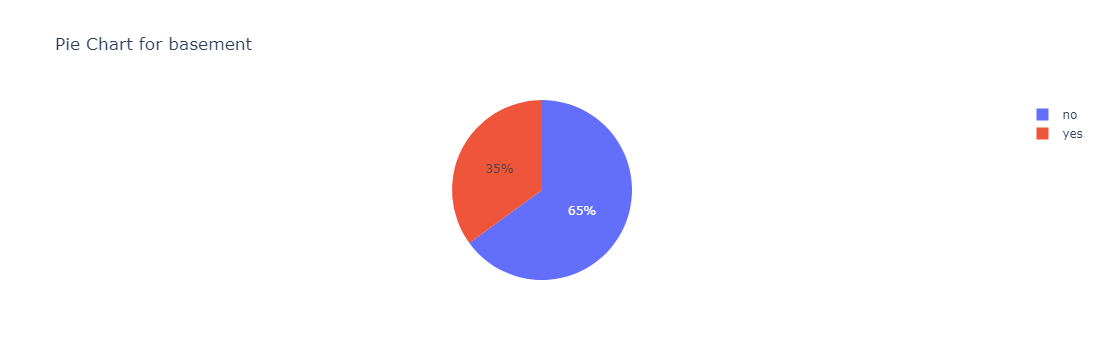

In [99]:
 draw_pie_chart(data, "basement")

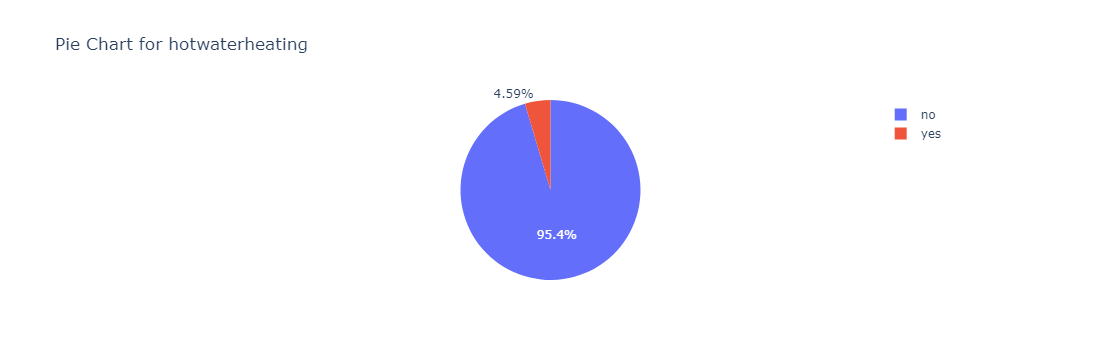

In [100]:
 draw_pie_chart(data, "hotwaterheating")

In [101]:
def categorical(category, title):
    cat = category.value_counts()
    fig = px.bar(
        x=cat.index, 
        y=cat.values,
        color=cat.index, 
        labels={"x": category.name, "y": "Counts"}
    )
    
    fig.update_layout(
        title={
            'text': title,
            'y':0.95,
            'x':0.5,
            'xanchor': 'center',
            'yanchor': 'top',
        
            'font': dict(
                size=24,
            )
        }
    )
    fig.show()

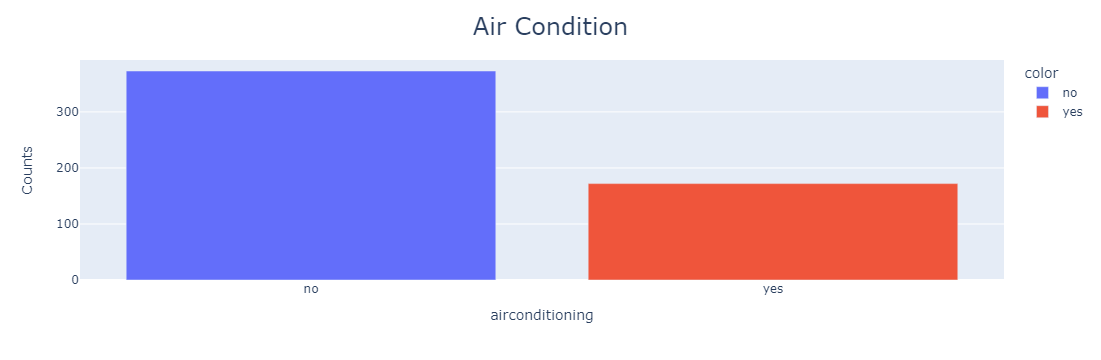

In [102]:
categorical(data["airconditioning"], "Air Condition")

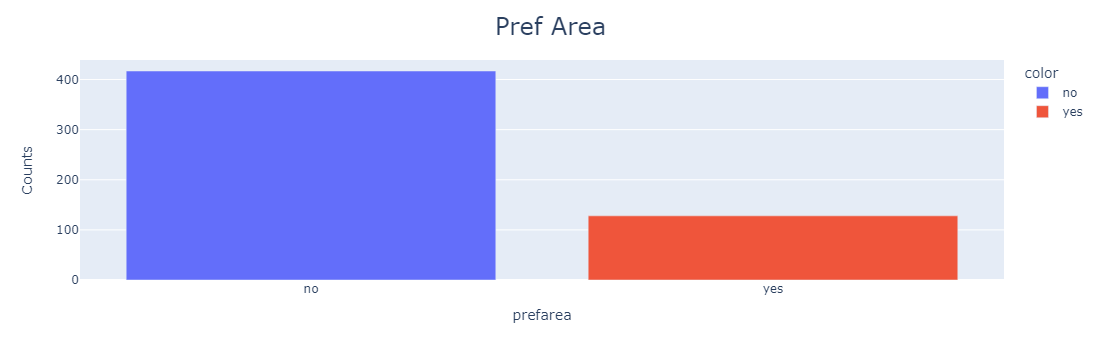

In [103]:
categorical(data["prefarea"],"Pref Area")

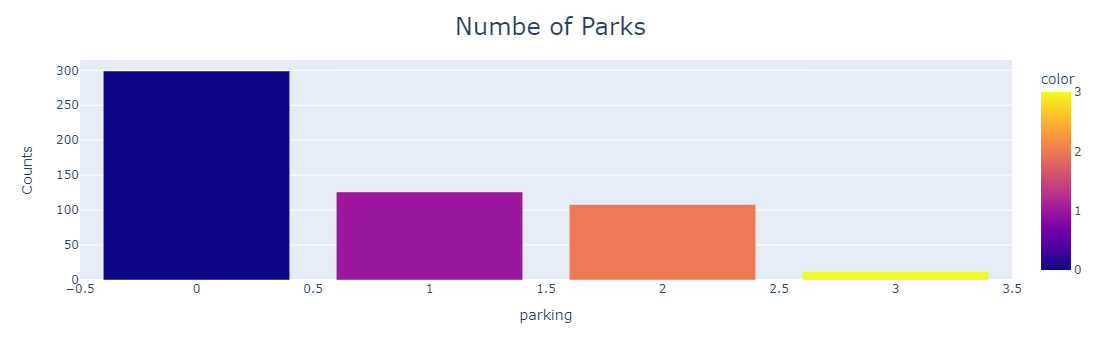

In [104]:
categorical(data["parking"],"Numbe of Parks")

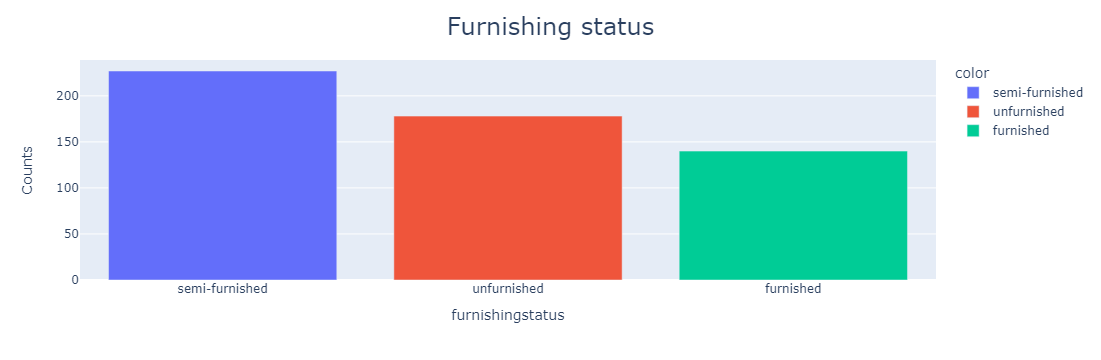

In [105]:
categorical(data["furnishingstatus"],"Furnishing status")

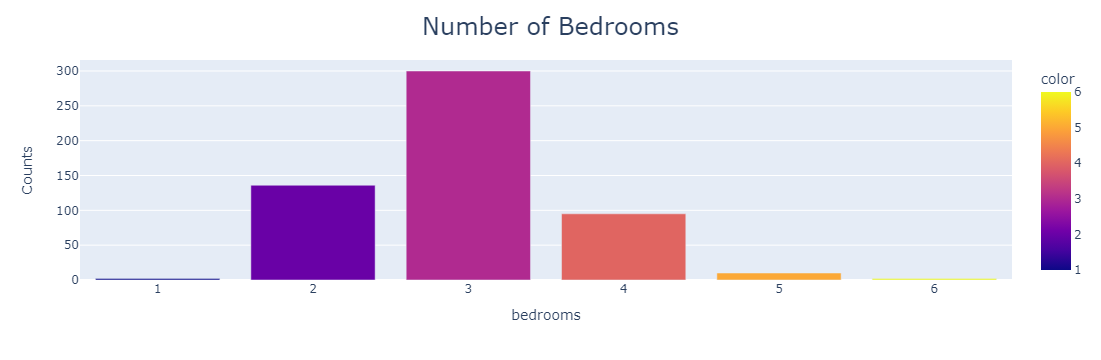

In [106]:
categorical(data["bedrooms"],"Number of Bedrooms")

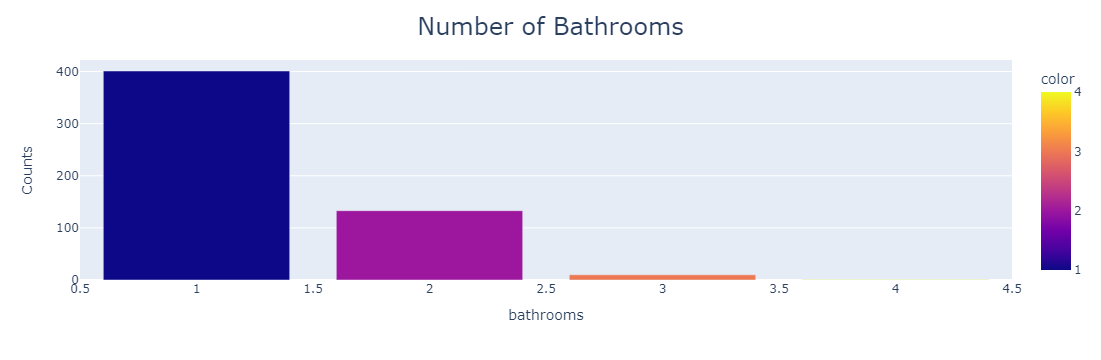

In [107]:
categorical(data["bathrooms"],"Number of Bathrooms")

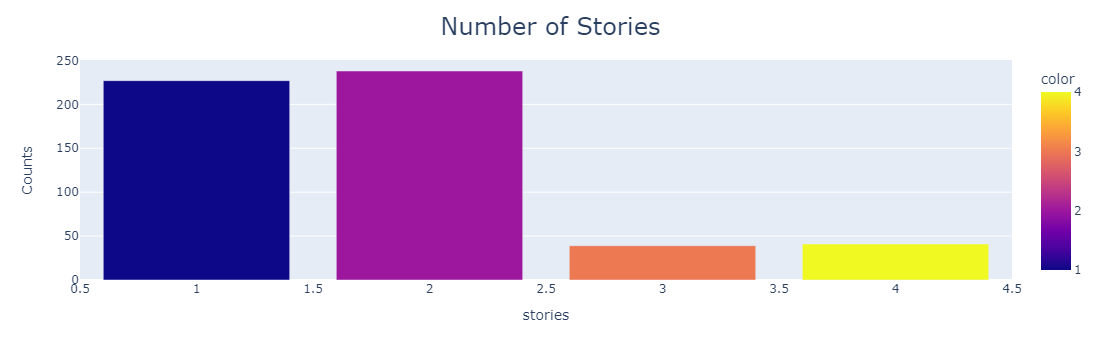

In [108]:
categorical(data["stories"],"Number of Stories")

In [109]:
# Function to show distribution of numerical data
def histogram ( data , x,title):
    fig = px.histogram(data , x )
    fig.update_layout(
        title={
            'text': title,
            'y':0.95,
            'x':0.5,
            'font': dict(
                size=24,
            )
        }
    )
    fig.show()

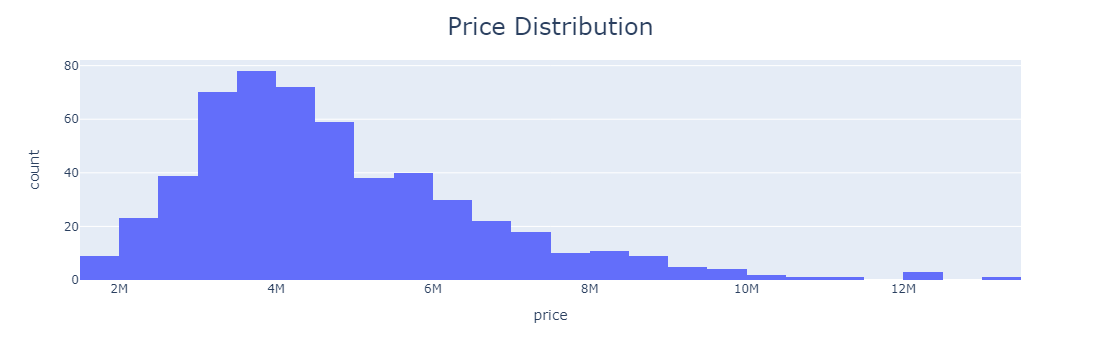

In [110]:
histogram(data , x ="price" ,title="Price Distribution " )

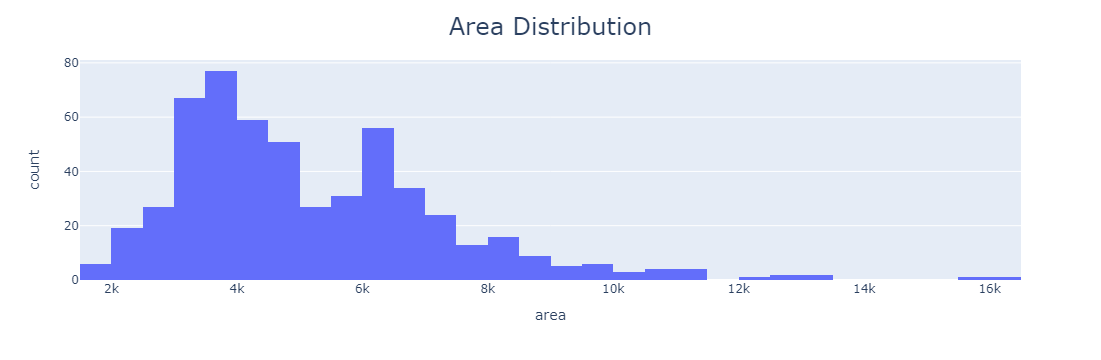

In [111]:
histogram(data , x ="area" ,title = "Area Distribution " )

In [112]:
def draw_box_plots(data):

    numerical_cols = data.select_dtypes(include=['number']).columns
    
    for column in numerical_cols:
        fig = go.Figure()
        fig.add_trace(go.Box(y=data[column], name=column))
        fig.update_layout(title=f'Box Plot for {column}', yaxis=dict(title=column))
        fig.show()

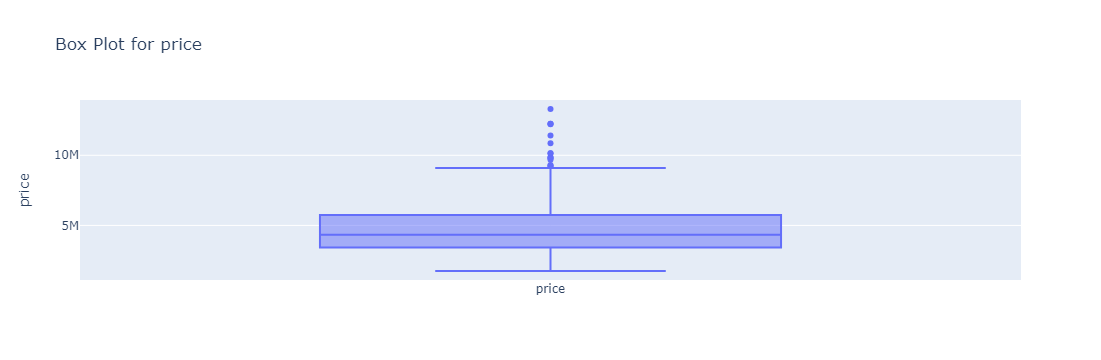

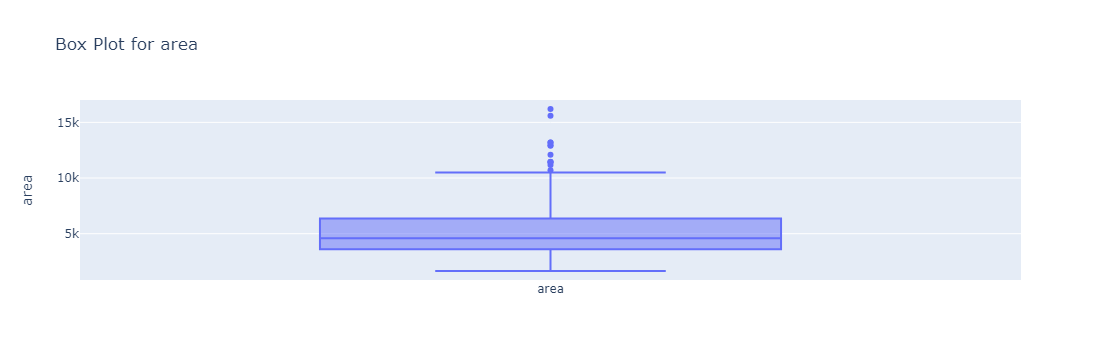

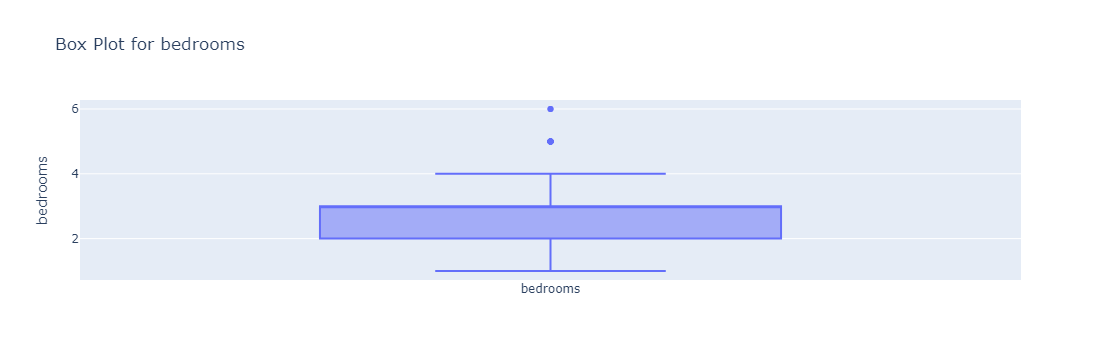

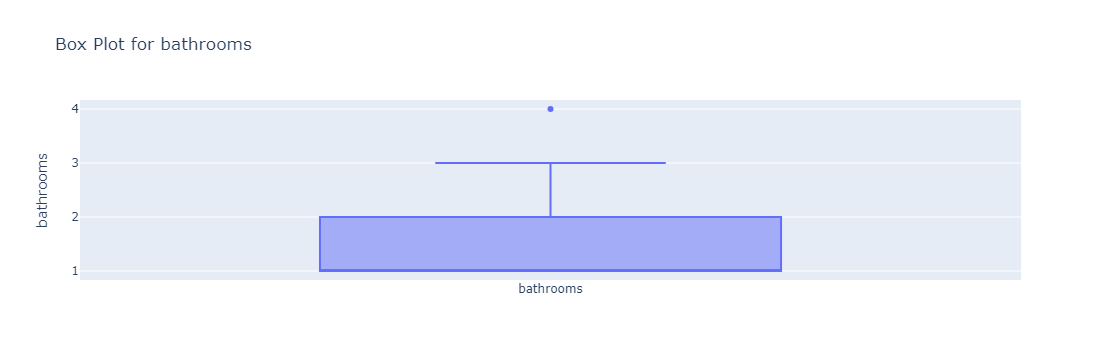

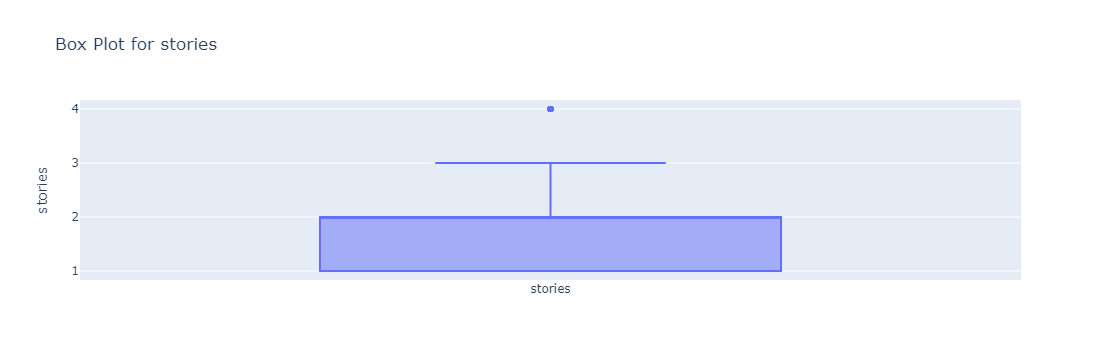

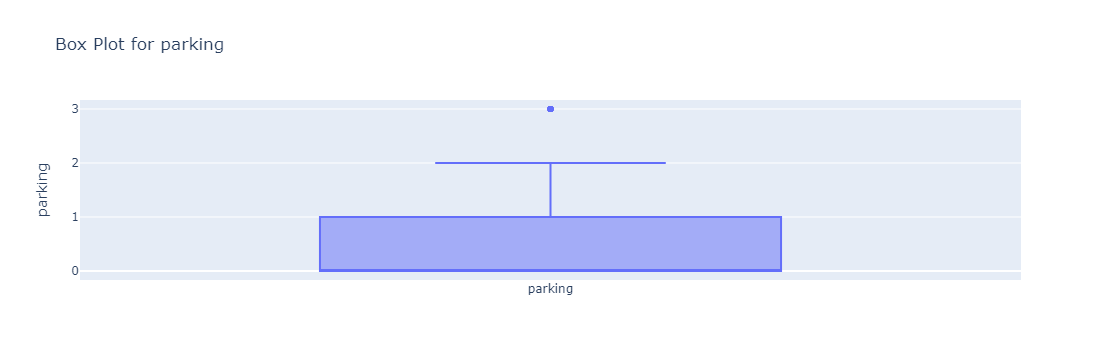

In [113]:
draw_box_plots(data)

# Data Preprocessong

In [114]:
def remove_outliers_and_plot(df):
    updated_df = df.copy()

    fig = go.Figure()

    for column in df.select_dtypes(include='number'):
        # Calculate the lower and upper bounds for outliers
        q1 = df[column].quantile(0.25)
        q3 = df[column].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr

        updated_df[column] = df[column].where((df[column] >= lower_bound) & (df[column] <= upper_bound), np.nan)

        fig.add_trace(go.Box(y=df[column], name=f"{column} (Before)"))
        fig.add_trace(go.Box(y=updated_df[column].dropna(), name=f"{column} (After)"))

    fig.update_layout(title="Columns Before and After Removing Outliers")
    fig.show()

    return updated_df

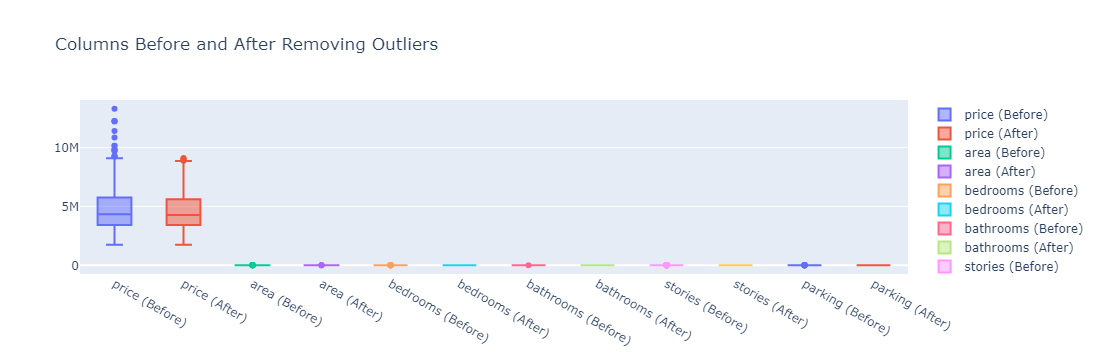

In [115]:
data = remove_outliers_and_plot(data)

In [116]:
def label_encode_categorical_columns(df):

    le = LabelEncoder()
    
    for column in df.columns:
        if df[column].dtype == 'object':
            df[column] = le.fit_transform(df[column])
    
    return df

In [117]:
data = label_encode_categorical_columns(data)
data.sample(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
496,2695000.0,4000.0,2.0,1.0,1.0,1,0,0,0,0,0.0,0,2
300,4200000.0,4079.0,3.0,1.0,3.0,1,0,0,0,0,0.0,0,1
504,2653000.0,3185.0,2.0,1.0,1.0,1,0,0,0,1,0.0,0,2
76,6650000.0,6420.0,3.0,2.0,3.0,1,0,0,0,1,0.0,1,0
223,4760000.0,6321.0,3.0,1.0,2.0,1,0,1,0,1,1.0,0,0


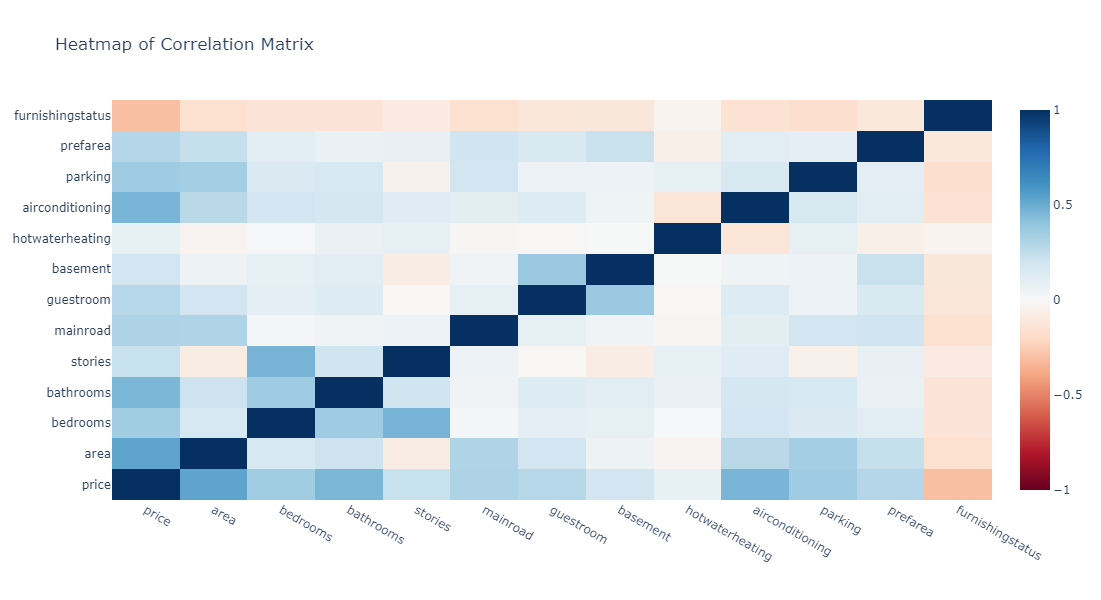

In [118]:
correlation_matrix = data.corr()
fig = go.Figure(data=go.Heatmap(
    z=correlation_matrix.values,
    x=correlation_matrix.columns,
    y=correlation_matrix.columns,
    colorscale='RdBu',
    zmin=-1, zmax=1
))

fig.update_layout(
    title='Heatmap of Correlation Matrix',
    xaxis_nticks=36,
    width=600,
    height=600,
    margin=dict(l=100, r=100, t=100, b=100)
)

fig.show()


# Feature Selection

In [119]:
x = data.drop('price', axis=1)
x

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420.0,4.0,2.0,3.0,1,0,0,0,1,2.0,1,0
1,8960.0,4.0,NaN,NaN,1,0,0,0,1,NaN,0,0
2,9960.0,3.0,2.0,2.0,1,0,1,0,0,2.0,1,1
3,7500.0,4.0,2.0,2.0,1,0,1,0,1,NaN,1,0
4,7420.0,4.0,1.0,2.0,1,1,1,0,1,2.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000.0,2.0,1.0,1.0,1,0,1,0,0,2.0,0,2
541,2400.0,3.0,1.0,1.0,0,0,0,0,0,0.0,0,1
542,3620.0,2.0,1.0,1.0,1,0,0,0,0,0.0,0,2
543,2910.0,3.0,1.0,1.0,0,0,0,0,0,0.0,0,0


In [120]:
y = data["price"]
y

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
         ...    
540    1820000.0
541    1767150.0
542    1750000.0
543    1750000.0
544    1750000.0
Name: price, Length: 545, dtype: float64

In [121]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [122]:
print(f'The shape of X train{x_train.shape}')
print(f'The shape of Y train{y_train.shape}')
print(f'The shape of X test{x_test.shape}')
print(f'The shape of Y test{y_test.shape}')

The shape of X train(381, 12)
The shape of Y train(381,)
The shape of X test(164, 12)
The shape of Y test(164,)


# Model Training and Evaluation

In [123]:
model = LinearRegression()
model.fit(x_train, y_train)

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
y_pred_train = model.predict(x_train)

In [ ]:
# Calculate evaluation metrics for the training set
mae_train = mean_absolute_error(y_train, y_pred_train)
mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_pred_train)

In [ ]:
print(f'Training Set Evaluation Metrics:')
print(f'MAE: {mae_train}')
print(f'MSE: {mse_train}')
print(f'RMSE: {rmse_train}')
print(f'R-squared: {r2_train}')

In [85]:
y_pred_test = model.predict(x_test)

In [86]:
mae_test = mean_absolute_error(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_pred_test)

In [87]:
print(f'\nTesting Set Evaluation Metrics:')
print(f'MAE: {mae_test}')
print(f'MSE: {mse_test}')
print(f'RMSE: {rmse_test}')
print(f'R-squared: {r2_test}')


Testing Set Evaluation Metrics:
MAE: 925543.5483156563
MSE: 1535047758428.0498
RMSE: 1238970.4429194627
R-squared: 0.6435419628959107
